<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Import Libraries
</p>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cuml.preprocessing import TargetEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Loading Dataset
</p>

In [2]:
#Importing Train, Test, and Training Extra Datasets

train = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv',index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv',index_col='id')
train_ex = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv",index_col='id')

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
DataSet Summary
</p>

In [3]:
print("Train DataSet Summary (First Rows,  Shape,  Data Types)")

display(train.head(), train.shape, train.dtypes)

Train DataSet Summary (First Rows,  Shape,  Data Types)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


(300000, 10)

Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

In [4]:
print("Test DataSet Summary (First Rows,  Shape,  Data Types)")

display(test.head(), test.shape, test.dtypes)

Test DataSet Summary (First Rows,  Shape,  Data Types)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


(200000, 9)

Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
dtype: object

In [5]:
print("Train_ex DataSet Summary (First Rows,  Shape,  Data Types)")

display(train_ex.head(), train_ex.shape, train_ex.dtypes)

Train_ex DataSet Summary (First Rows,  Shape,  Data Types)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


(3694318, 10)

Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 80px;
 margin-left: 0px;
">
  EDA (Exploratory Data Analysis)
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Target Data Distribution
</p>

Price Distributions in Train and Train_ex Datasets


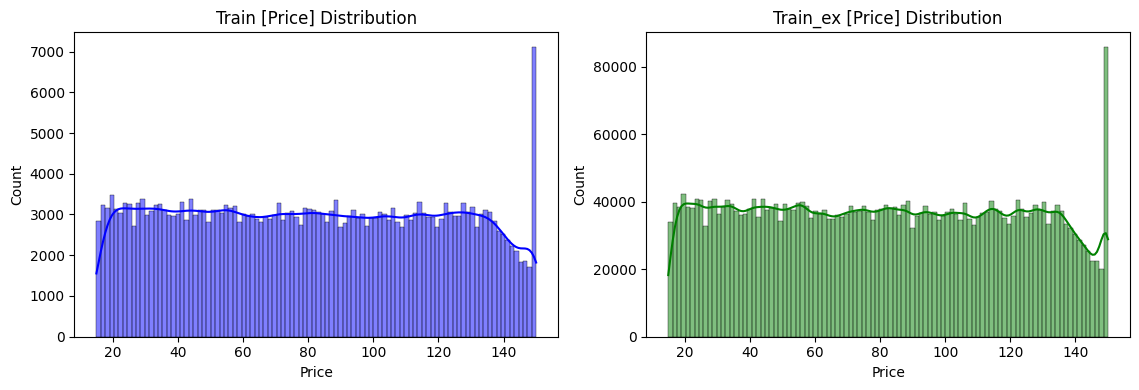

In [6]:
print("Price Distributions in Train and Train_ex Datasets")

plt.figure(figsize=(11.5, 4))

plt.subplot(1, 2, 1)
sns.histplot(train['Price'], bins=100, kde=True, color='blue')
plt.title("Train [Price] Distribution")
plt.xlabel("Price")

plt.subplot(1, 2, 2)
sns.histplot(train_ex['Price'], bins=100, kde=True, color='green')
plt.title("Train_ex [Price] Distribution")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Numeric Data Distribution
</p>

Numeric Data Distribution Across Train, Test, and Train_ex Datasets


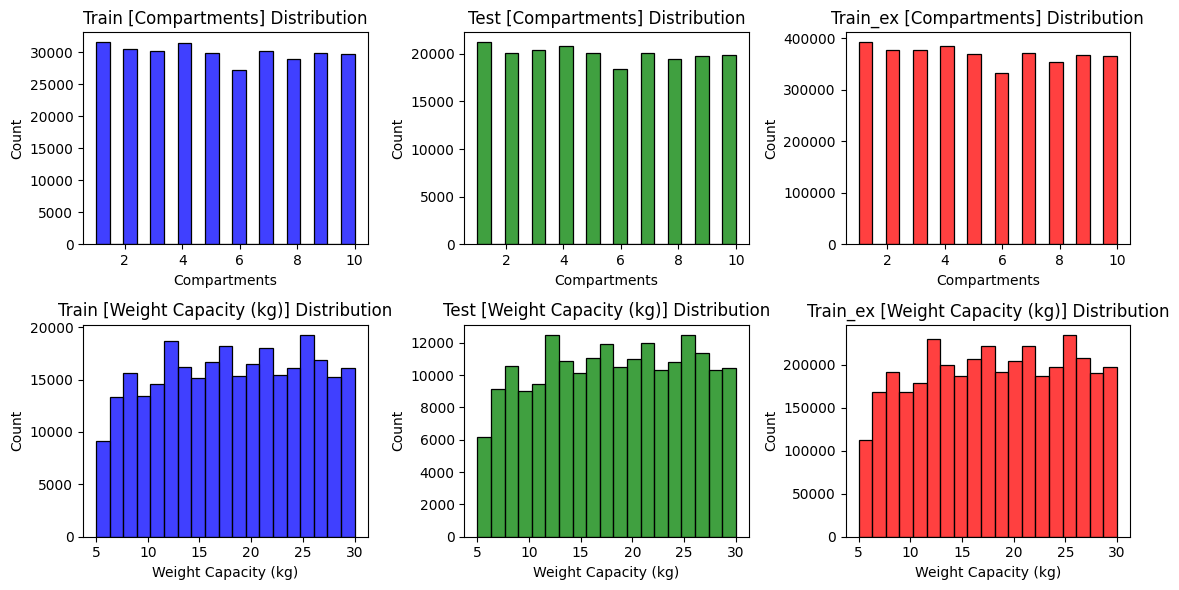

In [7]:
print("Numeric Data Distribution Across Train, Test, and Train_ex Datasets")

num_cols = test.select_dtypes(include=['number']).columns

plt.figure(figsize=(11.5, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 3, i*3 + 1)
    sns.histplot(train[col], bins=19, color='blue')
    plt.title(f"Train [{col}] Distribution")
    plt.xlabel(col)
    
    plt.subplot(len(num_cols), 3, i*3 + 2)
    sns.histplot(test[col], bins=19, color='green')
    plt.title(f"Test [{col}] Distribution")
    plt.xlabel(col)
    
    plt.subplot(len(num_cols), 3, i*3 + 3)
    sns.histplot(train_ex[col], bins=19, color='red')
    plt.title(f"Train_ex [{col}] Distribution")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Categorical Data Distribution
</p>

Donut Chart Comparison of Categorical Variables in Train, Test, and Train_ex Datasets


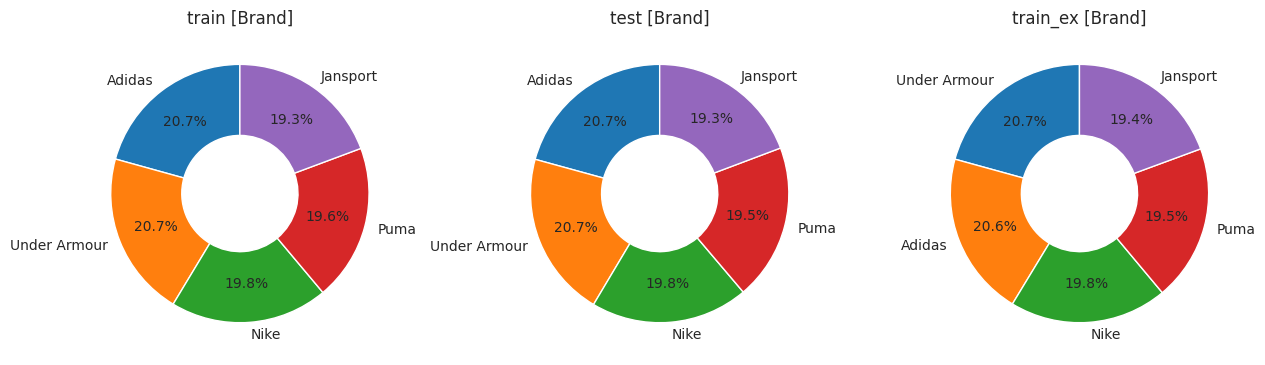

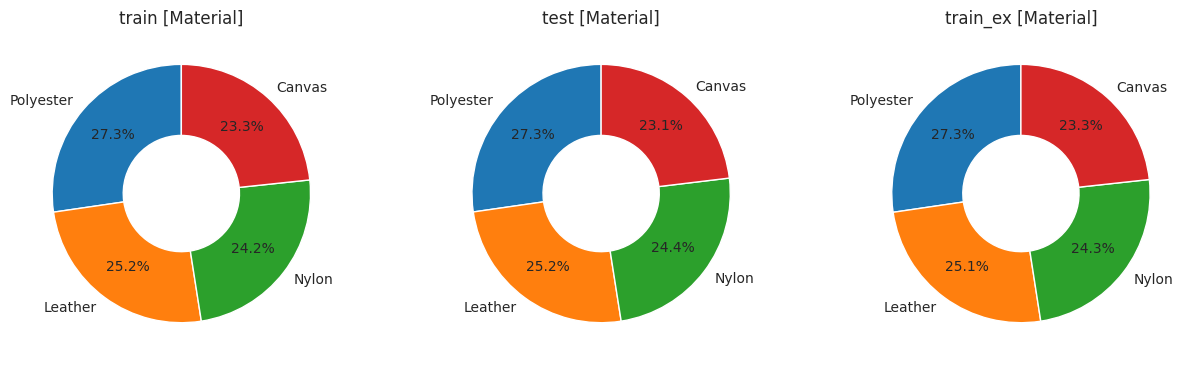

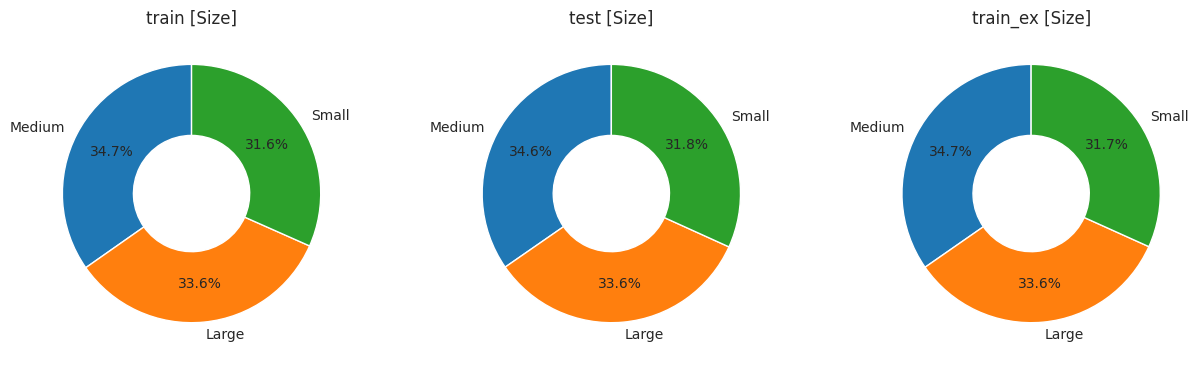

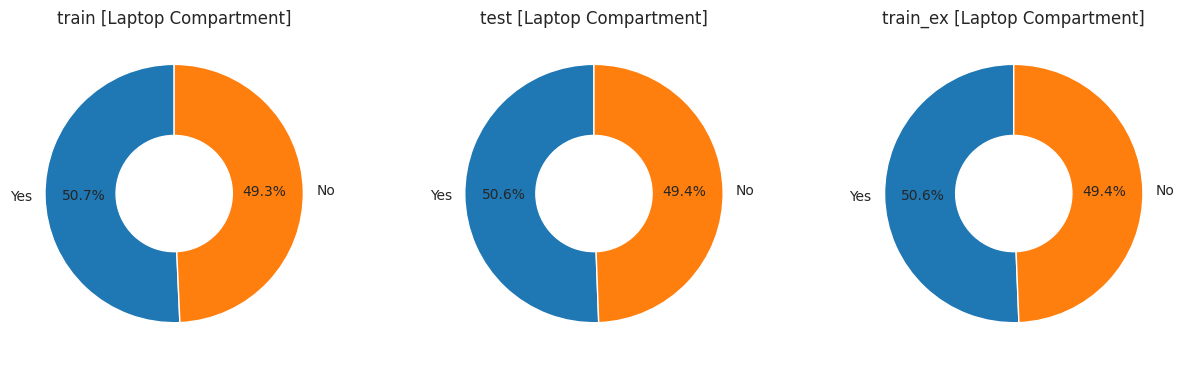

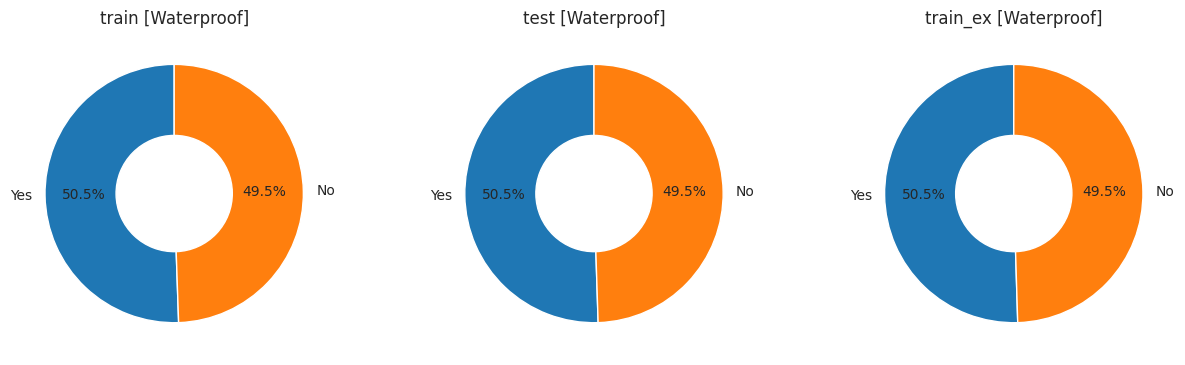

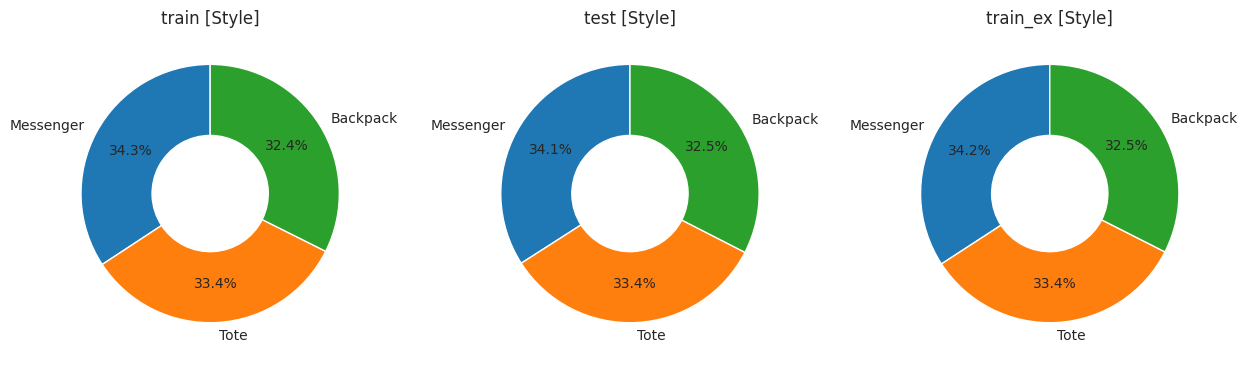

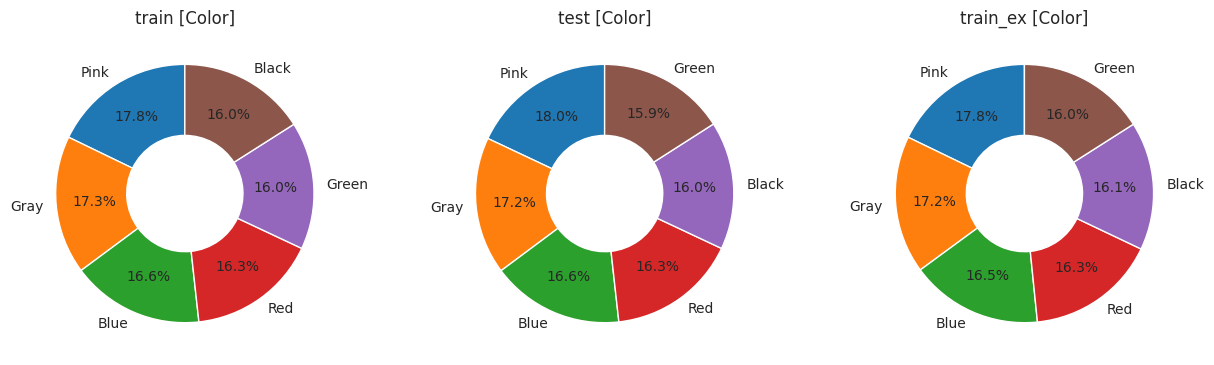

In [8]:
print("Donut Chart Comparison of Categorical Variables in Train, Test, and Train_ex Datasets")

# Get the columns with object data type
obj_cols = train.select_dtypes(include=['object']).columns

for variable in obj_cols:
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.3)
    
    # Donut Chart for Train data
    train[variable].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.55), pctdistance=0.7)
    axes[0].set_ylabel('')
    axes[0].set_title(f"train [{variable}]")
    
    # Donut Chart for Test data
    test[variable].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.55), pctdistance=0.7)
    axes[1].set_ylabel('')
    axes[1].set_title(f"test [{variable}]")
    
    # Donut Chart for Train_ex data
    train_ex[variable].value_counts().plot.pie(ax=axes[2], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.55), pctdistance=0.7)
    axes[2].set_ylabel('')
    axes[2].set_title(f"train_ex [{variable}]")
    
    plt.show()


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Missing Values Count
</p>

In [9]:
print("Missing Values Count for Train Dataset")

train.isnull().sum()

Missing Values Count for Train Dataset


Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [10]:
print("Missing Values Count for Test Dataset")

test.isnull().sum()

Missing Values Count for Test Dataset


Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [11]:
print("Missing Values Count for Train_ex Dataset")

train_ex.isnull().sum()

Missing Values Count for Train_ex Dataset


Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Missing Data Comparison
</p>

Comparative Charts of Missing Data in Train, Test, and Train_ex Datasets


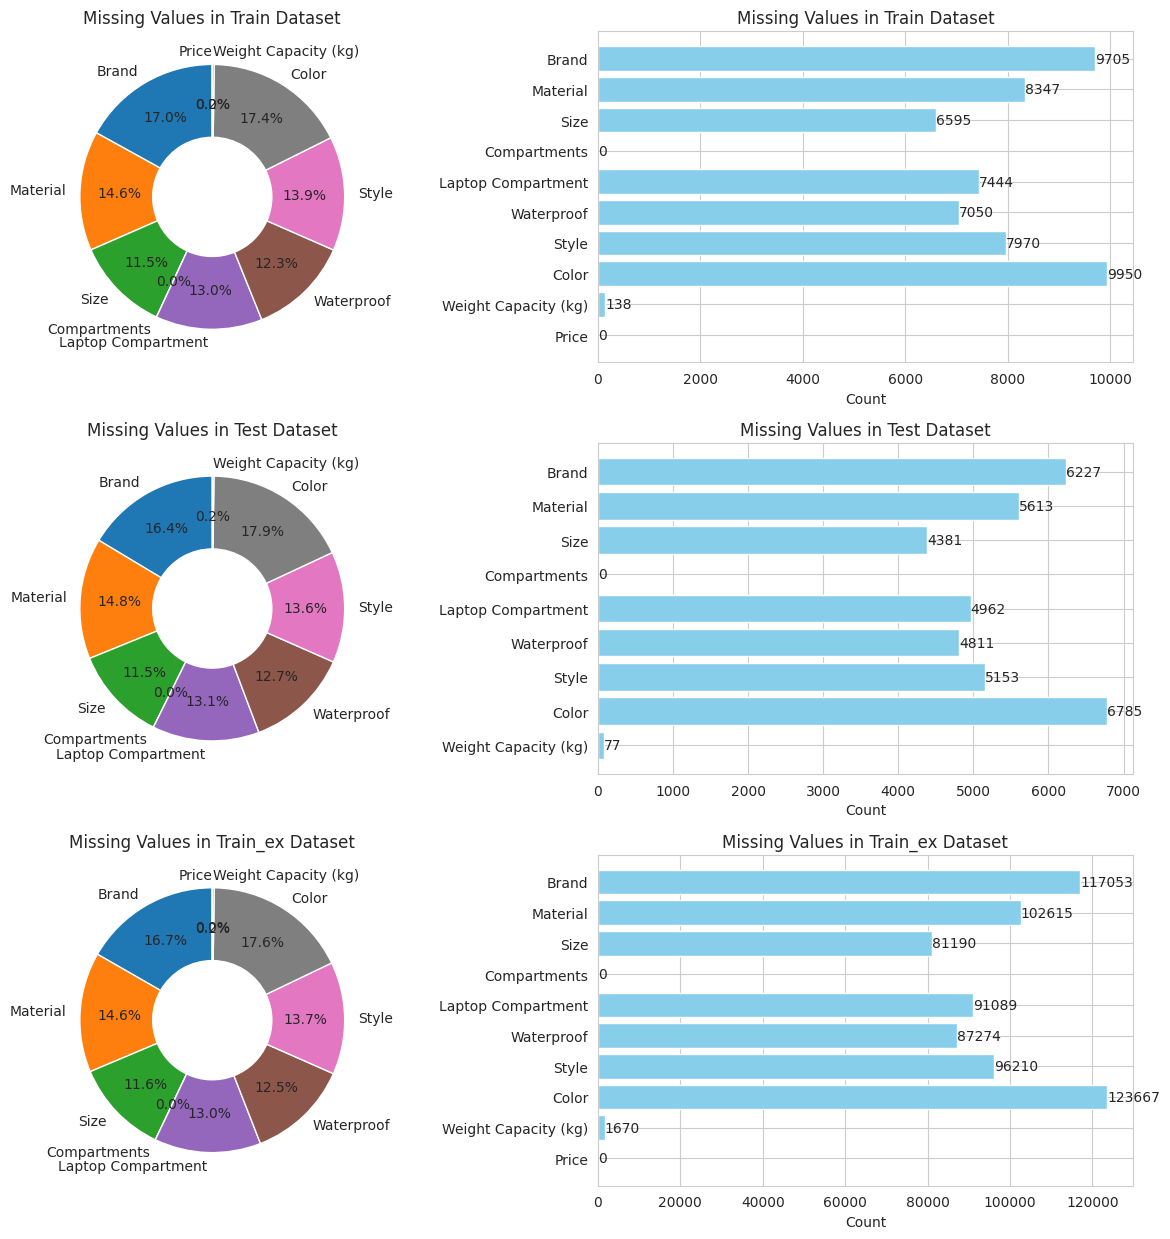

In [12]:
print("Comparative Charts of Missing Data in Train, Test, and Train_ex Datasets")

# Calculate the number of missing values
train_null = train.isnull().sum()
test_null = test.isnull().sum()
train_ex_null = train_ex.isnull().sum()

# Plot donut charts and bar plots
fig, axes = plt.subplots(3, 2, figsize=(12.5, 12.5))

# Function to add value labels to bars
def add_value_labels(bars, ax):
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

# Function to plot a single dataset
def plot_dataset(null_data, axes_row, title):
    axes_row[0].pie(null_data, labels=null_data.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.55), pctdistance=0.7)
    axes_row[0].set_title(f'Missing Values in {title} Dataset')
    bars = axes_row[1].barh(null_data.index, null_data.values, color='skyblue')
    axes_row[1].set_title(f'Missing Values in {title} Dataset')
    axes_row[1].set_xlabel('Count')
    axes_row[1].invert_yaxis()
    add_value_labels(bars, axes_row[1])

# Plot Charts of Missing Data for Train, Test, and Train_ex datasets
plot_dataset(train_null, axes[0], 'Train')
plot_dataset(test_null, axes[1], 'Test')
plot_dataset(train_ex_null, axes[2], 'Train_ex')
plt.tight_layout()
plt.show()


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Visualization of Missing Data Locations
</p>

Visualization of Missing Data Locations in Train, Test, and Train_ex Datasets


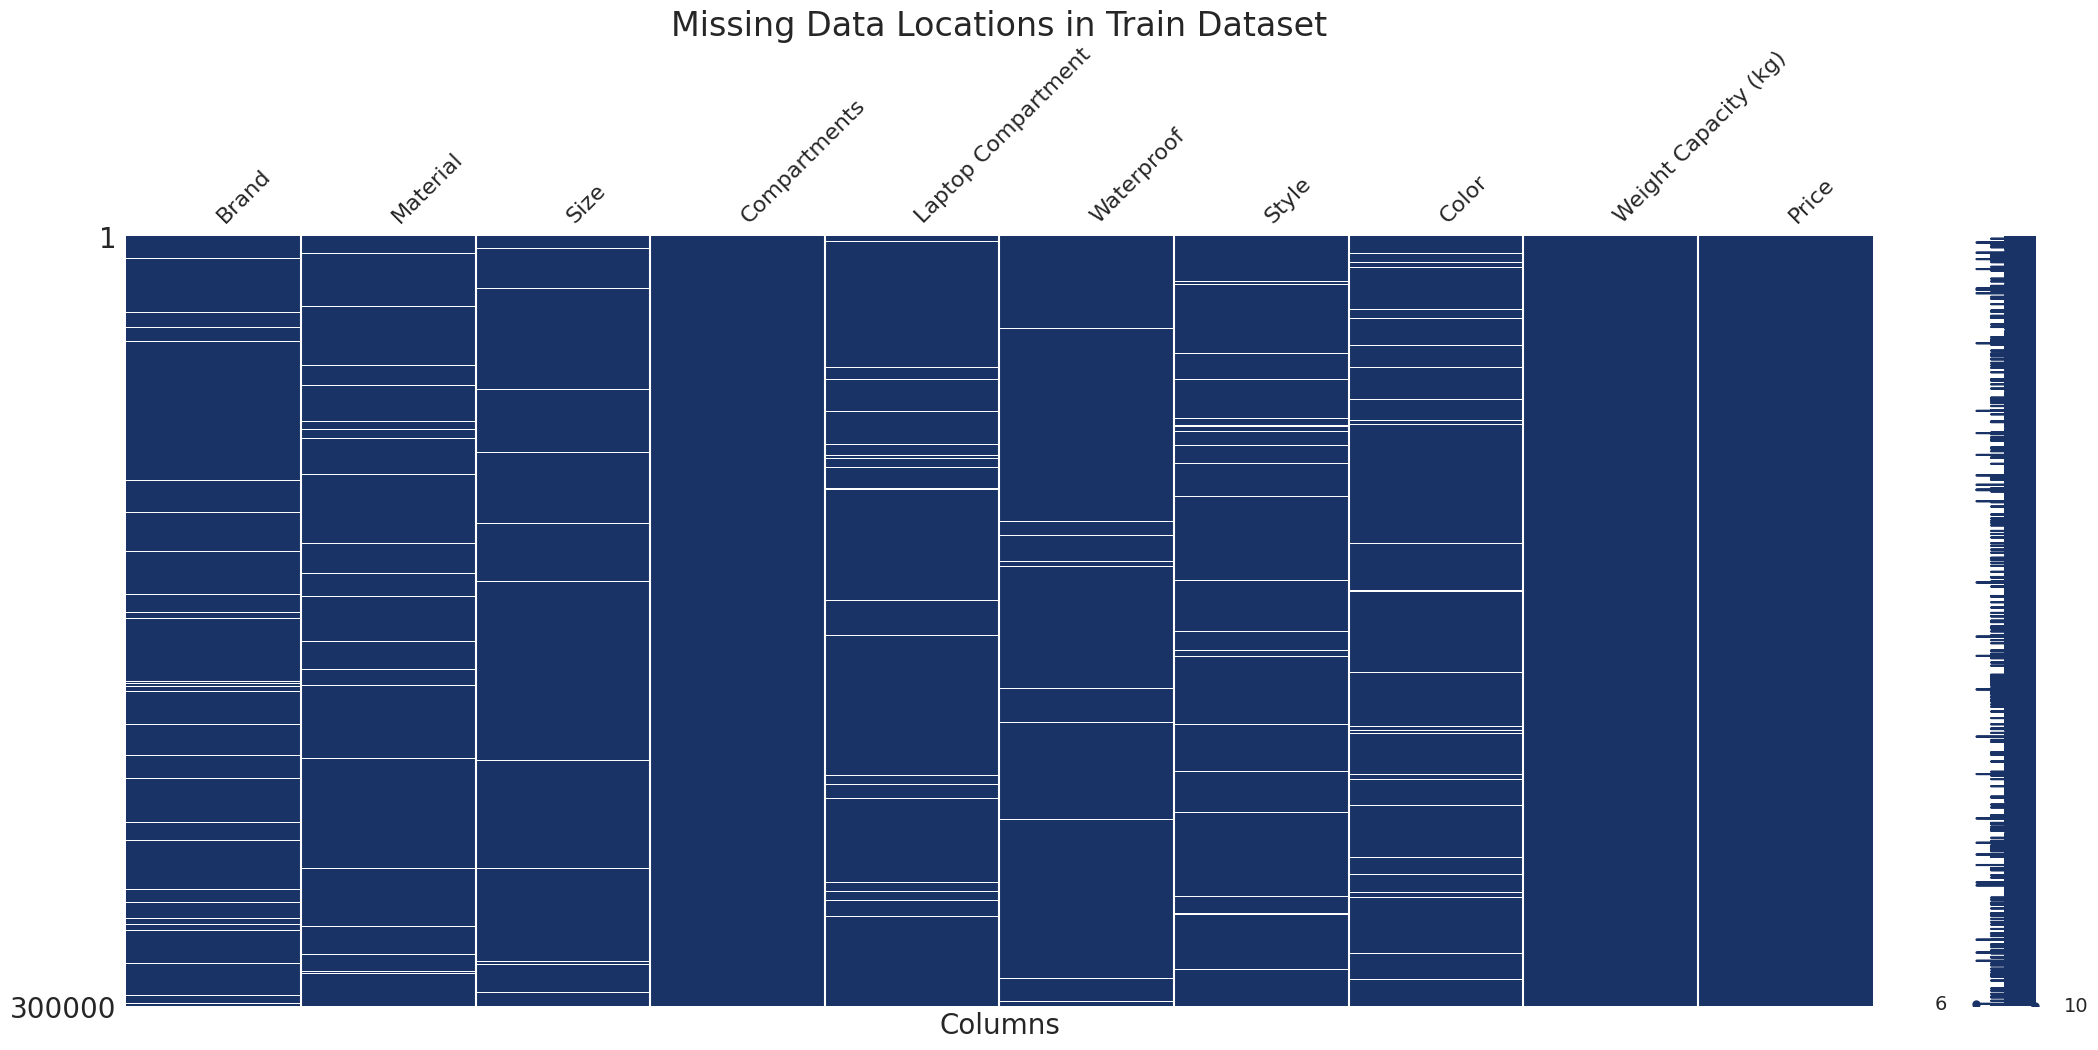

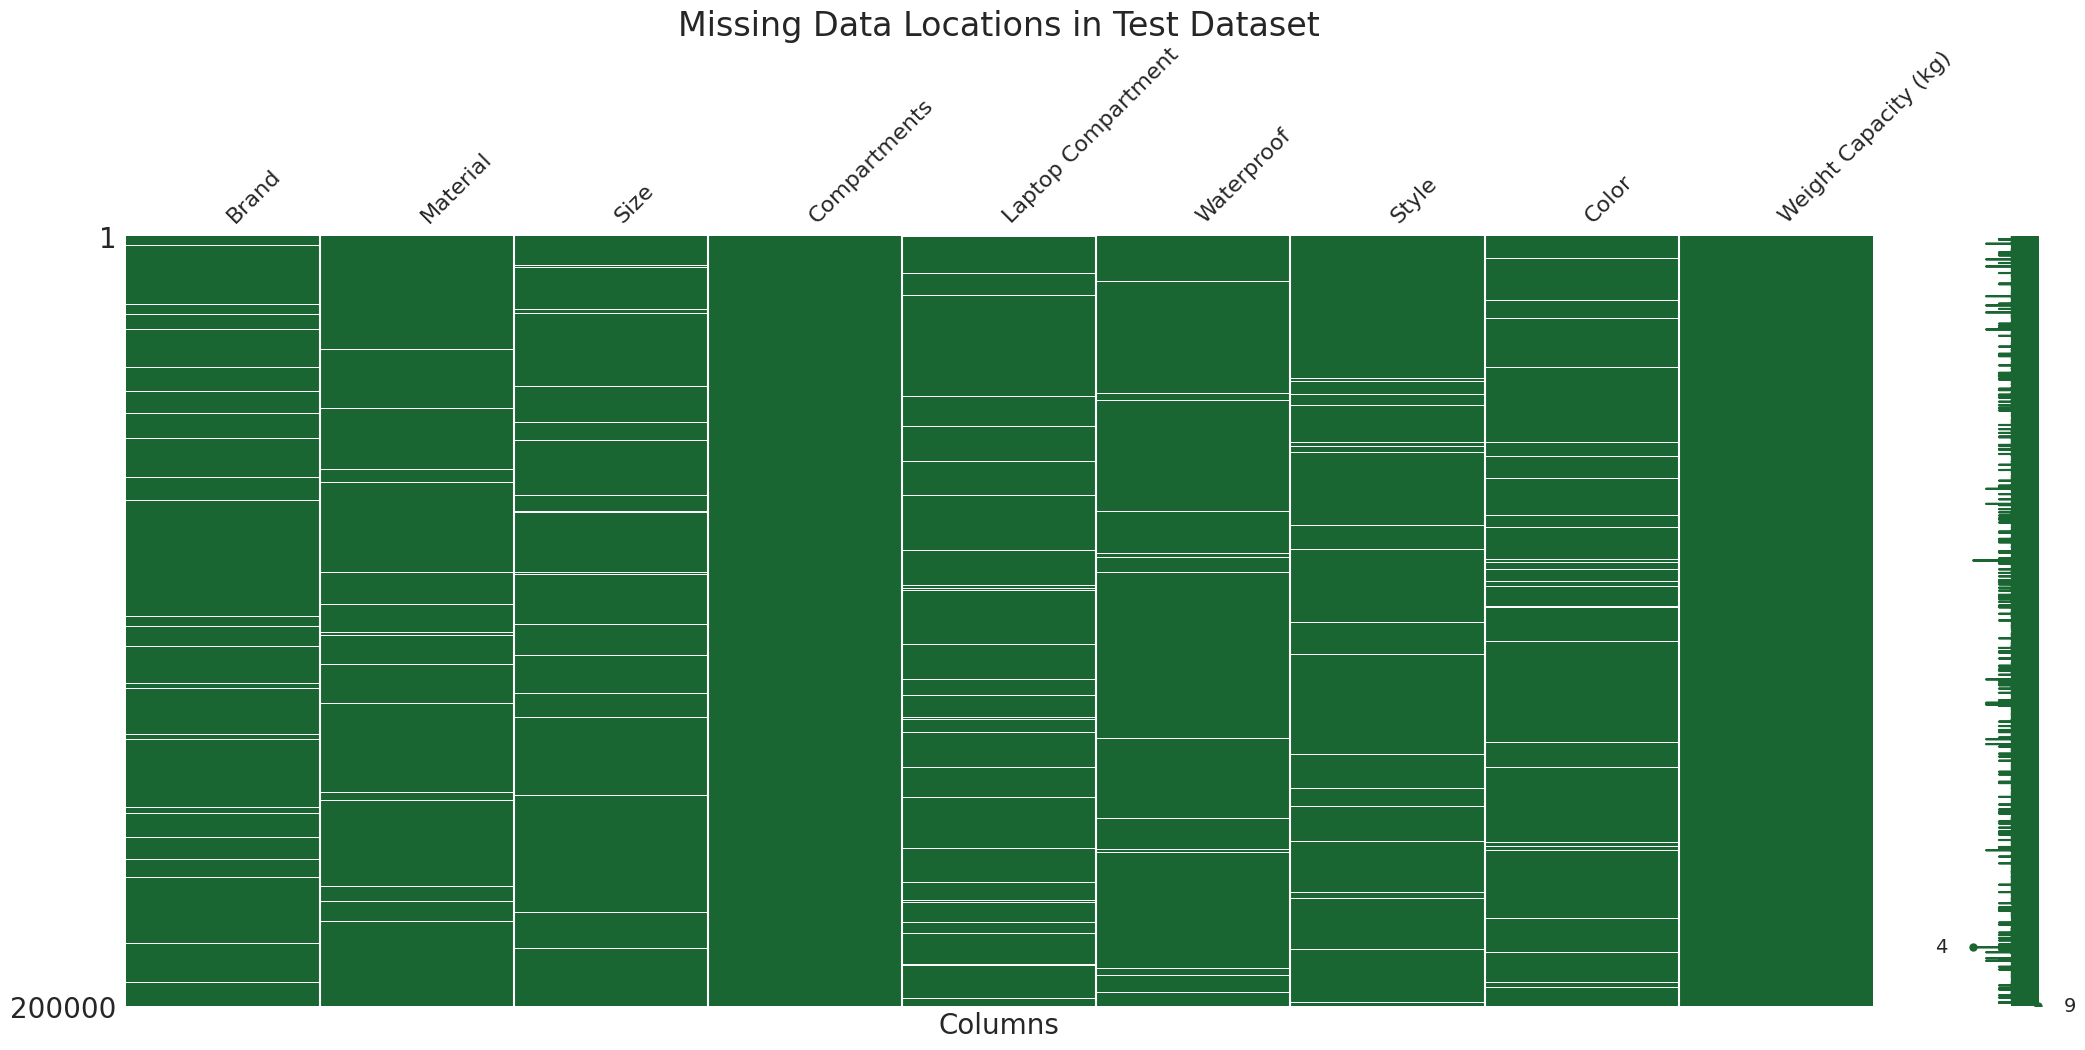

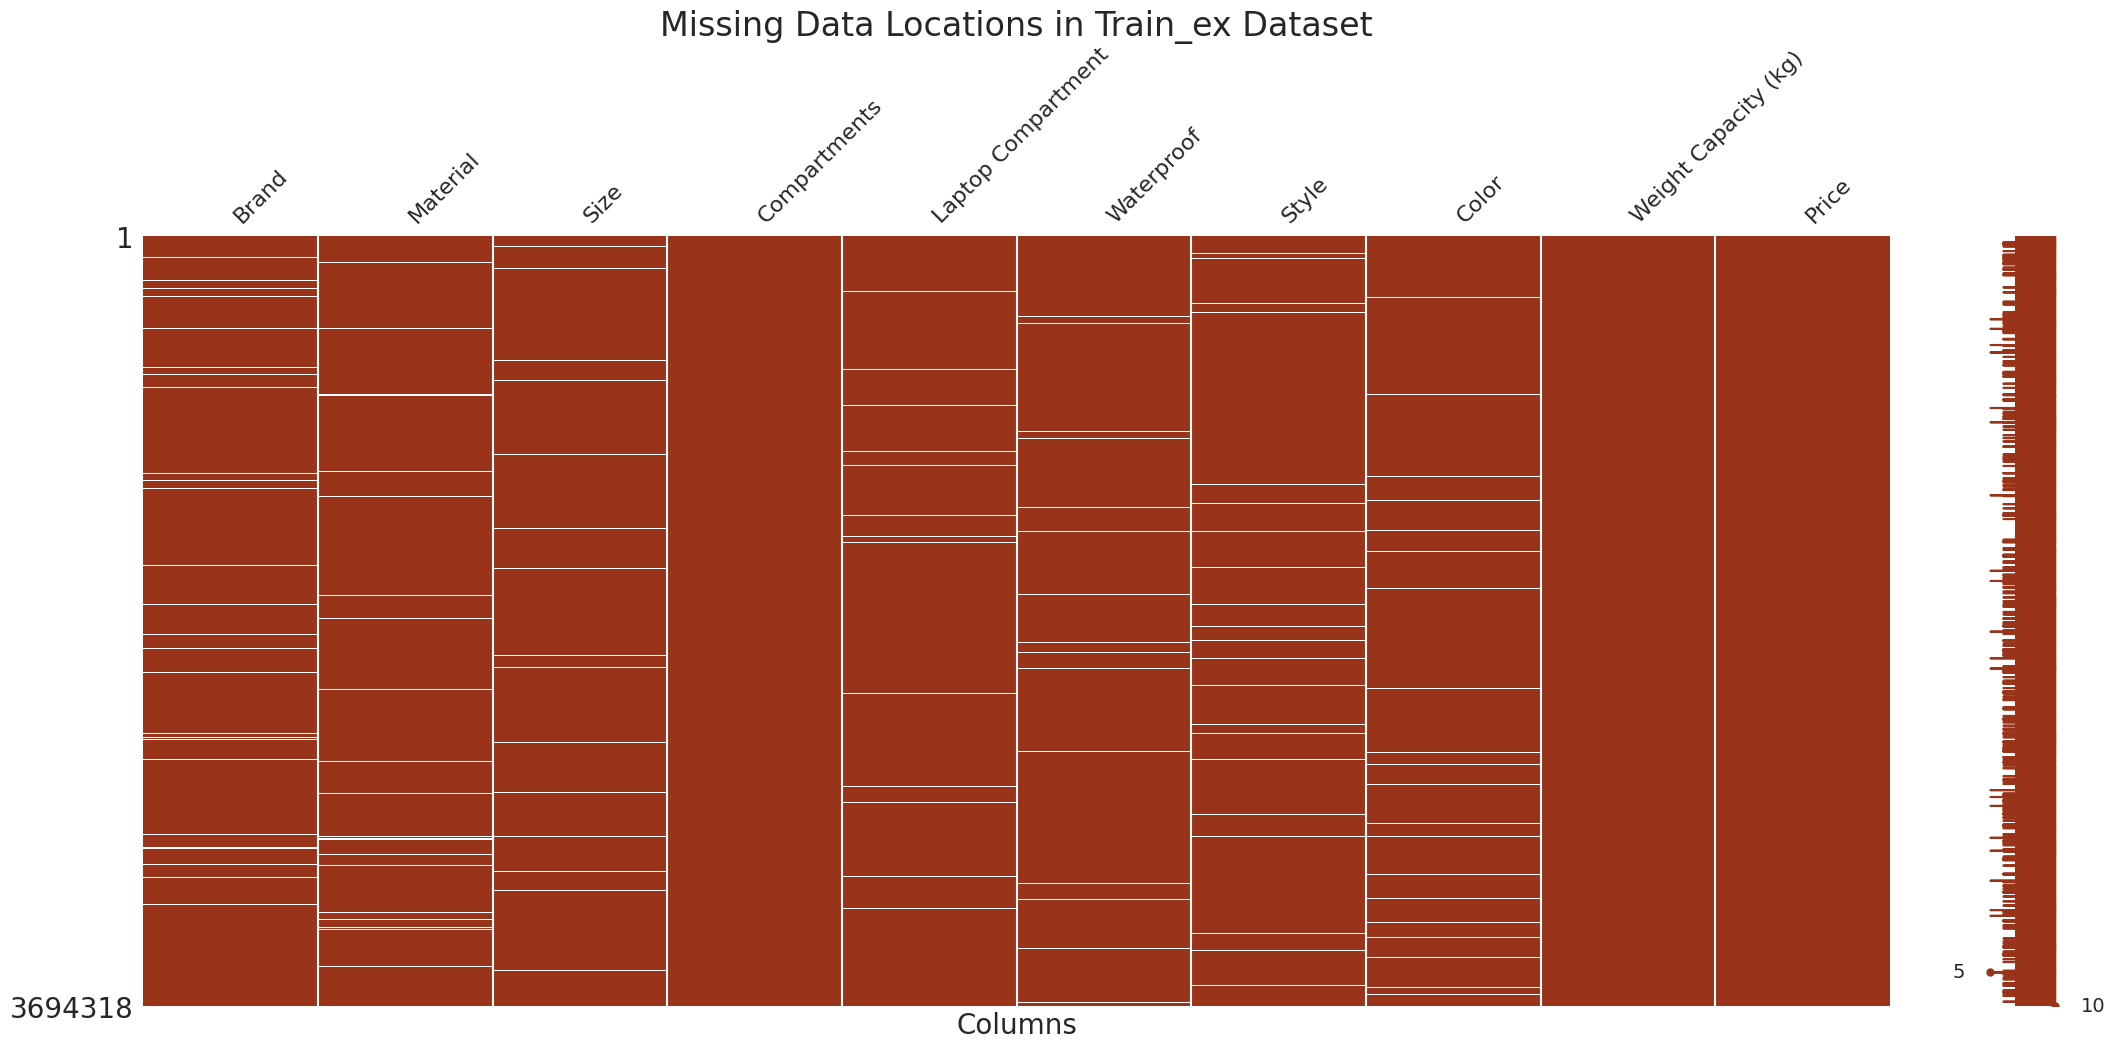

In [13]:
print("Visualization of Missing Data Locations in Train, Test, and Train_ex Datasets")

# Plot missing data matrix for Train dataset
msno.matrix(train, color=(0.1, 0.2, 0.4))
plt.title('Missing Data Locations in Train Dataset', fontsize=24)
plt.xlabel('Columns', fontsize=20)
plt.show()

# Plot missing data matrix for Test dataset
msno.matrix(test, color=(0.1, 0.4, 0.2))
plt.title('Missing Data Locations in Test Dataset', fontsize=24)
plt.xlabel('Columns', fontsize=20)
plt.show()

# Plot missing data matrix for Train_ex dataset
msno.matrix(train_ex, color=(0.6, 0.2, 0.1))
plt.title('Missing Data Locations in Train_ex Dataset', fontsize=24)
plt.xlabel('Columns', fontsize=20)
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Visualizing Missing Values
</p>

In [14]:
print("Visualizing Missing Values in Train, Test, and Train_ex Datasets\n")

# Function to highlight missing values in the DataFrame
def highlight_missing(val):
    if pd.isna(val):
        # Apply styling for missing values
        return 'background-color: SkyBlue; border: 1px solid red'
    else:
        return ''

# Function to get representative rows with missing values
def get_representative_rows(df):
    columns_with_issues = df.columns[df.isnull().sum() > 0]
    representative_rows = pd.concat(
        [df[df[col].isnull()].iloc[:1] for col in columns_with_issues]
    ).drop_duplicates()
    representative_rows_sorted = representative_rows.sort_values(by='id')
    return representative_rows_sorted

# Get representative rows with missing values for each dataset
train_representative = get_representative_rows(train)
test_representative = get_representative_rows(test)
train_ex_representative = get_representative_rows(train_ex)

# Apply styling to highlight missing values in each DataFrame
styled_train = train_representative.style.applymap(highlight_missing)
styled_test = test_representative.style.applymap(highlight_missing)
styled_train_ex = train_ex_representative.style.applymap(highlight_missing)

# Display the styled DataFrames separately
print("Missing Values in Train Dataset")
display(styled_train)

print("Missing Values in Test Dataset")
display(styled_test)

print("Missing Values in Train_ex Dataset")
display(styled_train_ex)


Visualizing Missing Values in Train, Test, and Train_ex Datasets

Missing Values in Train Dataset


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
5,Nike,Canvas,Medium,10.000000,No,Yes,nan,Black,7.241812,20.015530
6,Nike,nan,Large,3.000000,No,No,Backpack,Green,6.828123,84.805000
10,Nike,Polyester,Large,1.000000,Yes,No,Backpack,nan,27.806951,68.310470
11,Nike,Polyester,nan,10.000000,No,No,nan,Gray,13.697554,23.259630
22,Puma,Nylon,Large,7.000000,Yes,nan,Backpack,Gray,17.181182,132.685020
30,nan,Leather,Large,3.000000,No,Yes,Tote,Blue,21.304434,138.326990
54,Adidas,Polyester,Small,1.000000,nan,Yes,Messenger,Green,24.560936,52.896120
3168,nan,Polyester,Large,1.000000,No,No,Messenger,nan,nan,96.841900


Missing Values in Test Dataset


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300004,nan,Nylon,Large,2.000000,Yes,Yes,Tote,Black,9.907953
300030,Puma,Polyester,Medium,3.000000,No,No,Messenger,nan,26.865981
300032,Nike,nan,Small,3.000000,Yes,No,Tote,Blue,13.828847
300038,Jansport,Nylon,Small,3.000000,nan,No,Backpack,Green,6.557517
300043,Under Armour,Nylon,nan,4.000000,Yes,No,Messenger,Blue,14.190987
300044,Nike,Polyester,Small,8.000000,No,No,nan,Blue,29.058049
300047,Nike,Polyester,Small,3.000000,Yes,nan,Tote,Pink,25.964159
301350,Under Armour,Nylon,Large,1.000000,No,nan,Backpack,Green,nan


Missing Values in Train_ex Dataset


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
500005,Adidas,Polyester,Medium,5.000000,No,No,Tote,nan,18.834692,35.995990
500012,Under Armour,Nylon,Medium,1.000000,nan,No,Messenger,Pink,18.462269,130.223090
500022,nan,Nylon,Large,5.000000,No,No,Tote,Pink,23.626700,42.406870
500037,Puma,Polyester,Small,7.000000,No,nan,Tote,Black,19.647031,32.604320
500065,Puma,nan,Medium,9.000000,Yes,Yes,Messenger,Green,14.279998,36.363890
500093,Jansport,Polyester,Large,8.000000,Yes,No,nan,Red,21.547166,114.976560
500117,Jansport,Polyester,nan,8.000000,Yes,Yes,Messenger,Pink,18.998437,41.185010
501419,Under Armour,nan,Large,4.000000,Yes,nan,Tote,Blue,nan,28.867590


<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 120px;
 margin-left: 0px;
">
Data Preprocessing
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Merging Training Datasets
</p>

In [15]:
# Merging Train and Train_ex Data

train = pd.concat([train, train_ex], axis=0, ignore_index=True)


In [16]:
print("Updated Train Dataset")

train

Updated Train Dataset


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...
3994313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3994314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3994315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3994316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [17]:
print("Updated Train Dataset Types")

train.dtypes

Updated Train Dataset Types


Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

In [18]:
print("Missing Values Count for Updated Train Dataset")

train.isnull().sum()

Missing Values Count for Updated Train Dataset


Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Handling Missing Values - Numerical Columns
</p>

In [19]:
# Impute missing numerical data with the median values from the TRAIN dataset

num_cols = test.select_dtypes(include=['number']).columns

imputation_value = train[num_cols].median()

train[num_cols] = train[num_cols].fillna(imputation_value)
test[num_cols] = test[num_cols].fillna(imputation_value)

In [20]:
print("Missing Values and Data Types for Train Dataset")

display(train.dtypes, train.isnull().sum())

Missing Values and Data Types for Train Dataset


Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)         0
Price                        0
dtype: int64

In [21]:
print("Missing Values and Data Types for Test Dataset")

display(test.dtypes, test.isnull().sum())

Missing Values and Data Types for Test Dataset


Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
dtype: object

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)       0
dtype: int64

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Handling Missing Values - Categorical Columns
</p>

In [22]:
# Impute Missing Values in Object Columns with 'None'

obj_cols = train.select_dtypes(include=['object']).columns

train[obj_cols] = train[obj_cols].fillna('None')
test[obj_cols] = test[obj_cols].fillna('None')

In [23]:
print("Missing Values and Data Types for Train Dataset")

display(train.dtypes, train.isnull().sum())

Missing Values and Data Types for Train Dataset


Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [24]:
print("Missing Values and Data Types for Test Dataset")

display(test.dtypes, test.isnull().sum())

Missing Values and Data Types for Test Dataset


Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
dtype: object

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Feature Transformation Using TargetEncoder
</p>

In [25]:

TE = TargetEncoder(n_folds=25, smooth=20, split_method='random', stat='mean')

features = test.columns.tolist()

for col in features:
    TE.fit(train[col], train['Price'])
    train[col] = TE.transform(train[col])
    test[col] = TE.transform(test[col])


In [26]:
print("Train DataSet Summary (First Rows,  Shape,  Data Types)")

display(train.head(8).T, train.shape, train.dtypes)


Train DataSet Summary (First Rows,  Shape,  Data Types)


,0,1,2,3,4,5,6,7
Brand,81.772869,81.780718,82.079035,81.290746,80.534376,81.270492,81.295487,81.228513
Material,80.493705,81.829363,80.496205,81.066592,81.828947,81.809852,81.305868,81.831973
Size,81.199831,81.467312,81.478402,81.466540,81.203896,81.201738,81.608734,81.459890
Compartments,81.618870,81.592441,81.637459,81.720310,81.037067,81.540556,81.160465,81.027372
Laptop Compartment,81.413628,81.421134,81.432393,81.418340,81.430019,81.344335,81.351283,81.423876
Waterproof,81.443211,81.409085,81.445734,81.436281,81.414882,81.409850,81.434027,81.403772
Style,81.504309,81.185370,81.185122,81.188170,81.197596,81.962156,81.365597,81.349353
Color,80.323226,82.246231,81.001902,82.262451,82.243816,80.312150,82.245303,82.014855
Weight Capacity (kg),82.719096,81.362175,81.362175,81.362175,81.362175,78.006301,81.362175,85.610965
Price,112.158750,68.880560,39.173200,80.607930,86.023120,20.015530,84.805000,27.158150


(3994318, 10)

Brand                   float64
Material                float64
Size                    float64
Compartments            float64
Laptop Compartment      float64
Waterproof              float64
Style                   float64
Color                   float64
Weight Capacity (kg)    float64
Price                   float64
dtype: object

In [27]:
print("Test DataSet Summary (First Rows,  Shape,  Data Types)")

display(test.head(8).T, test.shape, test.dtypes)


Test DataSet Summary (First Rows,  Shape,  Data Types)


id,300000,300001,300002,300003,300004,300005,300006,300007
Brand,81.225581,81.284807,80.527704,80.527704,80.991908,82.065190,81.284807,81.777538
Material,80.488767,81.831012,81.831012,81.071800,81.071800,81.071800,81.071800,82.029411
Size,81.467619,81.201380,81.611743,81.611743,81.611743,81.201380,81.611743,81.201380
Compartments,81.616343,81.601272,80.280580,81.032032,81.616343,81.730617,81.730617,81.641985
Laptop Compartment,81.350487,81.350487,81.350487,81.420190,81.420190,81.350487,81.350487,81.420190
Waterproof,81.438524,81.411425,81.411425,81.438524,81.411425,81.438524,81.411425,81.438524
Style,81.500005,81.357717,81.185534,81.185534,81.500005,81.357717,81.500005,81.357717
Color,82.252331,82.252331,82.013370,82.252331,80.326122,80.326122,82.013370,82.013370
Weight Capacity (kg),82.752365,80.938726,90.901021,78.336685,81.362175,82.206737,91.936141,74.124884


(200000, 9)

Brand                   float64
Material                float64
Size                    float64
Compartments            float64
Laptop Compartment      float64
Waterproof              float64
Style                   float64
Color                   float64
Weight Capacity (kg)    float64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
 Dataset Normalization
</p>

In [28]:
# Data Normalization Using StandardScaler

columns=test.columns
scaler = StandardScaler()
train[columns] = scaler.fit_transform(train[columns])
test[columns] = scaler.transform(test[columns])


In [29]:
print("Train DataSet Summary (First Rows,  Shape,  Data Types)")

display(train.head(8).T, train.shape, train.dtypes)

Train DataSet Summary (First Rows,  Shape,  Data Types)


,0,1,2,3,4,5,6,7
Brand,0.776798,0.791644,1.355884,-0.135097,-1.565704,-0.173404,-0.126128,-0.252805
Material,-1.419285,0.763503,-1.415200,-0.483049,0.762824,0.731617,-0.092015,0.767769
Size,-0.365304,0.236521,0.261474,0.234784,-0.356158,-0.361014,0.554718,0.219822
Compartments,0.615028,0.551708,0.659566,0.858064,-0.778890,0.427400,-0.483246,-0.802116
Laptop Compartment,0.337250,0.386453,0.460249,0.368135,0.444688,-0.116942,-0.071405,0.404426
Waterproof,0.200984,0.116335,0.207243,0.183795,0.130713,0.118232,0.178204,0.103156
Style,0.885519,-1.101502,-1.103046,-1.084058,-1.025332,3.737953,0.021334,-0.079870
Color,-1.600335,1.361751,-0.554941,1.386735,1.358030,-1.617396,1.360321,1.005353
Weight Capacity (kg),0.331466,0.025718,0.025718,0.025718,0.025718,-0.730443,0.025718,0.983076
Price,112.158750,68.880560,39.173200,80.607930,86.023120,20.015530,84.805000,27.158150


(3994318, 10)

Brand                   float64
Material                float64
Size                    float64
Compartments            float64
Laptop Compartment      float64
Waterproof              float64
Style                   float64
Color                   float64
Weight Capacity (kg)    float64
Price                   float64
dtype: object

In [30]:
print("Test DataSet Summary (First Rows,  Shape,  Data Types)")

display(test.head(8).T, test.shape, test.dtypes)

Test DataSet Summary (First Rows,  Shape,  Data Types)


id,300000,300001,300002,300003,300004,300005,300006,300007
Brand,-0.258350,-0.146330,-1.578323,-1.578323,-0.700323,1.329697,-0.146330,0.785629
Material,-1.427355,0.766198,0.766198,-0.474538,-0.474538,-0.474538,-0.474538,1.090430
Size,0.237212,-0.361820,0.561489,0.561489,0.561489,-0.361820,0.561489,-0.361820
Compartments,0.608974,0.572867,-2.591325,-0.790953,0.608974,0.882759,0.882759,0.670410
Laptop Compartment,-0.076623,-0.076623,-0.076623,0.380262,0.380262,-0.076623,-0.076623,0.380262
Waterproof,0.189357,0.122139,0.122139,0.189357,0.122139,0.189357,0.122139,0.189357
Style,0.858705,-0.027764,-1.100478,-1.100478,0.858705,-0.027764,0.858705,-0.027764
Color,1.371146,1.371146,1.003065,1.371146,-1.595875,-1.595875,1.003065,1.003065
Weight Capacity (kg),0.338962,-0.069695,2.175056,-0.656000,0.025718,0.216019,2.408294,-1.605023


(200000, 9)

Brand                   float64
Material                float64
Size                    float64
Compartments            float64
Laptop Compartment      float64
Waterproof              float64
Style                   float64
Color                   float64
Weight Capacity (kg)    float64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Boxplots of Normalized Features
</p>

Boxplot Analysis of Normalized Train and Test Data


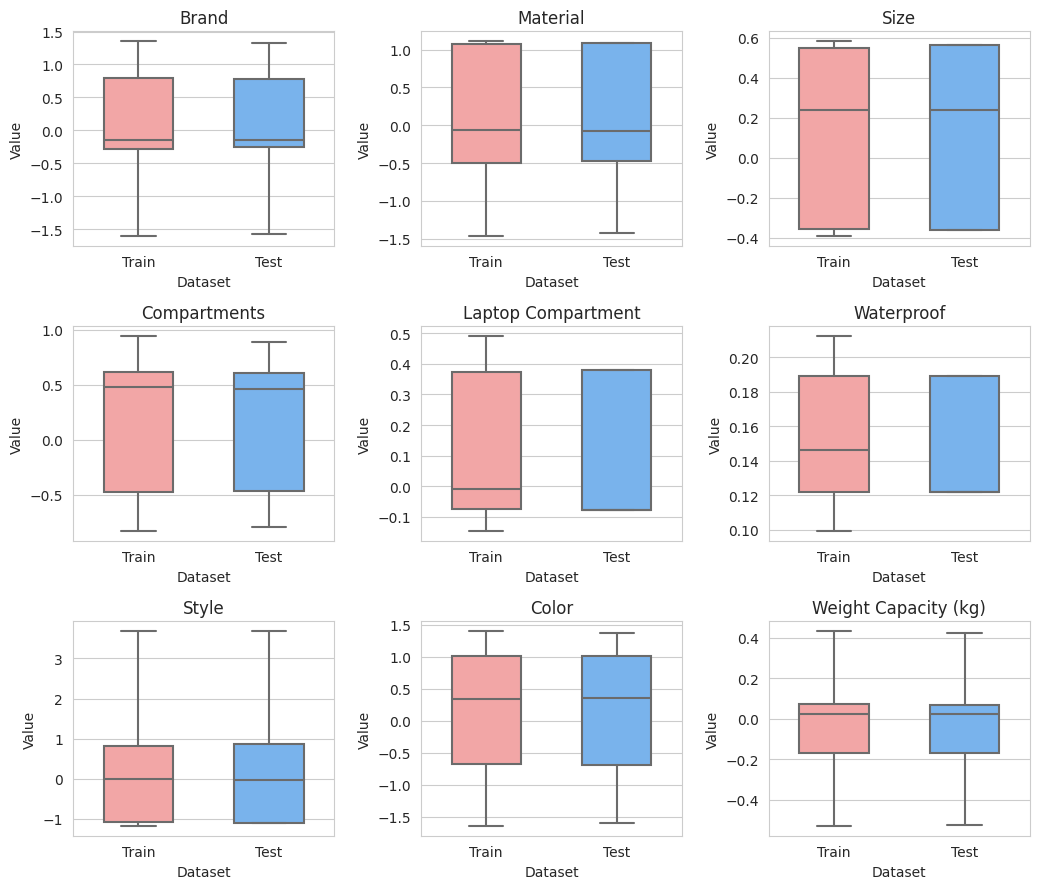

In [31]:
print("Boxplot Analysis of Normalized Train and Test Data")

def plot_combined_boxplot_grid(train, test, columns, palette='Set2'):
    sns.set_style('whitegrid')
    
    num_columns = 3
    num_rows = (len(columns) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(10.5, 3 * num_rows))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    for idx, column in enumerate(columns):
        row = idx // num_columns
        col = idx % num_columns

        combined_data = pd.DataFrame({
            'Value': list(train[column]) + list(test[column]),
            'Dataset': ['Train'] * len(train[column]) + ['Test'] * len(test[column])
        })

        sns.boxplot(x='Dataset', y='Value', data=combined_data, ax=axes[row, col], palette=palette, showfliers=False, width=0.53)
        axes[row, col].set_title(f'{column}')

    for idx in range(len(columns), num_rows * num_columns):
        axes[idx // num_columns, idx % num_columns].axis('off')
    
    plt.tight_layout()
    plt.show()

custom_palette = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plot_combined_boxplot_grid(train, test, test.columns, palette=custom_palette)


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Correlation Heatmap
</p>

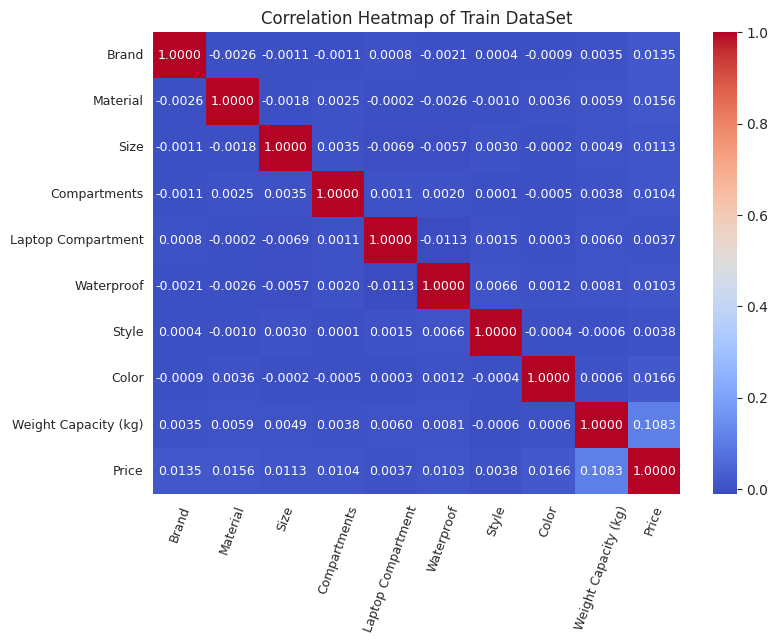

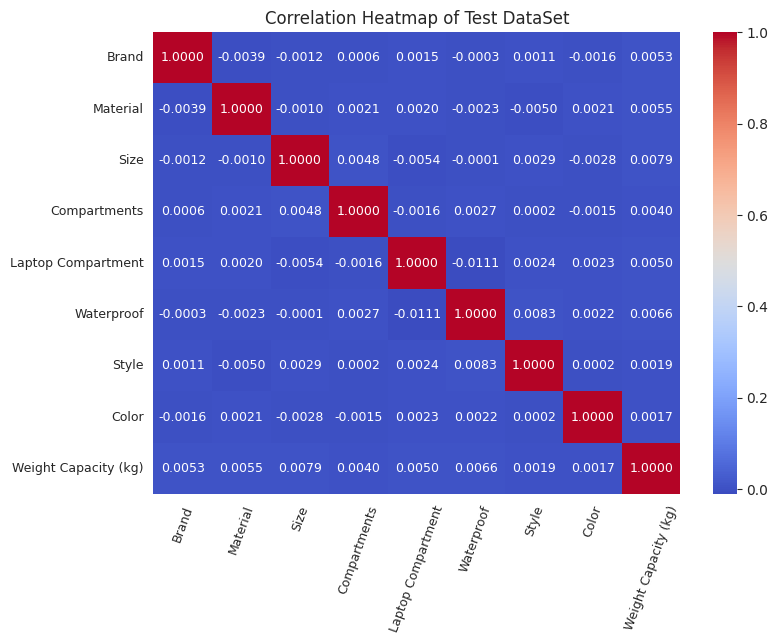

In [32]:
#Correlation Heatmap Analysis for Train and Test Datasets

def plot_correlation_heatmap(data, title):
    plt.figure(figsize=(8.5, 6))
    heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".4f", annot_kws={"size":9})
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70, fontsize=9)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)
    plt.title(title)
    plt.show()

# Correlation Heatmap of Train Dataset
plot_correlation_heatmap(train, 'Correlation Heatmap of Train DataSet')

# Correlation Heatmap of Test Dataset
plot_correlation_heatmap(test, 'Correlation Heatmap of Test DataSet')


<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 120px;
 margin-left: 0px;
">
  Model Building & Evaluation
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Set Training Data
</p>

In [33]:
# Set the target variable 'Price' as y and features as X for training data

X = train.drop(['Price'], axis=1)
y = train['Price']

In [34]:
print("Features X Summary (First Rows,  Shape,  Data Types)")

display(X.head(), X.shape, X.dtypes)

Features X Summary (First Rows,  Shape,  Data Types)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,0.776798,-1.419285,-0.365304,0.615028,0.337250,0.200984,0.885519,-1.600335,0.331466
1,0.791644,0.763503,0.236521,0.551708,0.386453,0.116335,-1.101502,1.361751,0.025718
2,1.355884,-1.415200,0.261474,0.659566,0.460249,0.207243,-1.103046,-0.554941,0.025718
3,-0.135097,-0.483049,0.234784,0.858064,0.368135,0.183795,-1.084058,1.386735,0.025718
4,-1.565704,0.762824,-0.356158,-0.778890,0.444688,0.130713,-1.025332,1.358030,0.025718


(3994318, 9)

Brand                   float64
Material                float64
Size                    float64
Compartments            float64
Laptop Compartment      float64
Waterproof              float64
Style                   float64
Color                   float64
Weight Capacity (kg)    float64
dtype: object

In [35]:
print("Target y Summary (First Rows,  Shape,  Data Type)")

display(y.head(), y.shape, y.dtypes)

Target y Summary (First Rows,  Shape,  Data Type)


0    112.15875
1     68.88056
2     39.17320
3     80.60793
4     86.02312
Name: Price, dtype: float64

(3994318,)

dtype('float64')

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Evaluation metric
</p>

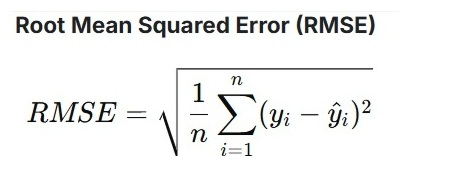

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
DNN Model
</p>

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,393 (107.00 KB)

 Trainable params: 26,753 (104.50 KB)

 Non-trainable params: 640 (2.50 KB)

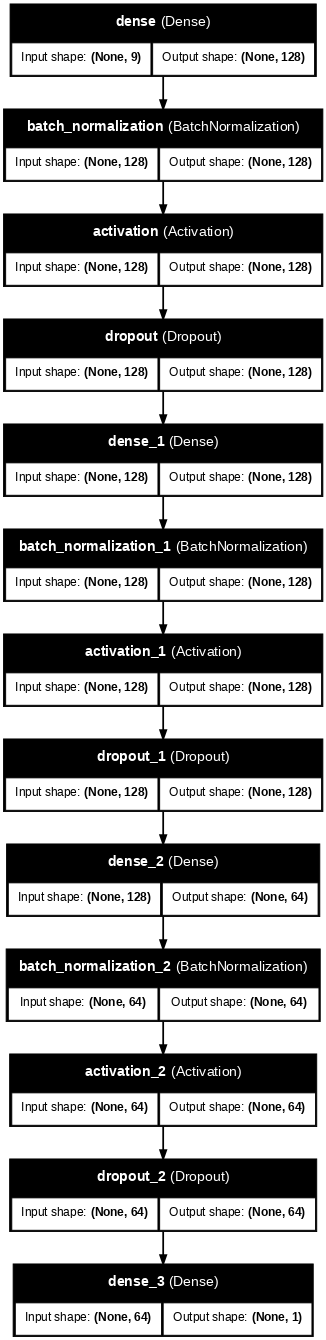

In [36]:
# Split train and validation data
train_id, val_id = train_test_split(X.index, test_size=0.2, random_state=42)
X_train, X_val = X.iloc[train_id], X.iloc[val_id]
y_train, y_val = y.iloc[train_id], y.iloc[val_id]

# DNN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    
    Dense(128, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    
    Dense(64, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Show the model summary
model.summary()
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=63)


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Model Training
</p>

In [37]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}/{self.params["epochs"]} - Val RMSE: {logs["val_root_mean_squared_error"]}')

# Model Training
search = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    batch_size=2048,
    callbacks=[early_stopping, CustomCallback()],
    validation_data=(X_val, y_val),
    verbose=0
)

# Best Val RMSE
best_rmse = min(search.history['val_root_mean_squared_error'])  
print("\nBest Val RMSE : ", best_rmse)


Epoch 1/50 - Val RMSE: 38.700252532958984
Epoch 2/50 - Val RMSE: 38.68104934692383
Epoch 3/50 - Val RMSE: 38.677310943603516
Epoch 4/50 - Val RMSE: 38.67758560180664
Epoch 5/50 - Val RMSE: 38.67033767700195
Epoch 6/50 - Val RMSE: 38.66840362548828
Epoch 7/50 - Val RMSE: 38.667354583740234
Epoch 8/50 - Val RMSE: 38.67817306518555
Epoch 9/50 - Val RMSE: 38.667091369628906
Epoch 10/50 - Val RMSE: 38.666263580322266
Epoch 11/50 - Val RMSE: 38.66618728637695
Epoch 12/50 - Val RMSE: 38.66980743408203
Epoch 13/50 - Val RMSE: 38.668636322021484
Epoch 14/50 - Val RMSE: 38.66902542114258
Epoch 15/50 - Val RMSE: 38.66340637207031
Epoch 16/50 - Val RMSE: 38.666648864746094
Epoch 17/50 - Val RMSE: 38.664833068847656
Epoch 18/50 - Val RMSE: 38.67507553100586
Epoch 19/50 - Val RMSE: 38.66389465332031
Epoch 20/50 - Val RMSE: 38.663597106933594
Epoch 21/50 - Val RMSE: 38.6638069152832
Epoch 22/50 - Val RMSE: 38.67281723022461
Epoch 23/50 - Val RMSE: 38.665042877197266
Epoch 24/50 - Val RMSE: 38.6685142

Plot the evolution of RMSE during training


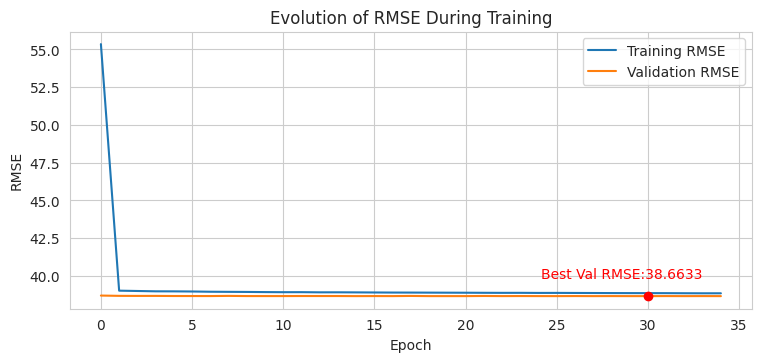

In [38]:
print("Plot the evolution of RMSE during training")

val_rmse_array = np.array(search.history['val_root_mean_squared_error'])

best_val_epoch = val_rmse_array.argmin()
best_val_rmse = val_rmse_array[best_val_epoch]

# Create figure and plot RMSE
plt.figure(figsize=(8.8, 3.6))
plt.plot(search.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(search.history['val_root_mean_squared_error'], label='Validation RMSE')

plt.plot(best_val_epoch, best_val_rmse, 'ro')
plt.text(best_val_epoch+3, best_val_rmse+1, f'Best Val RMSE:{best_val_rmse:.4f}',
         fontsize=10, color='red', verticalalignment='bottom', horizontalalignment='right')

plt.title('Evolution of RMSE During Training')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Validation Predicted Results
</p>

Comparison of Validation True and Predicted Values

24965/24965 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step


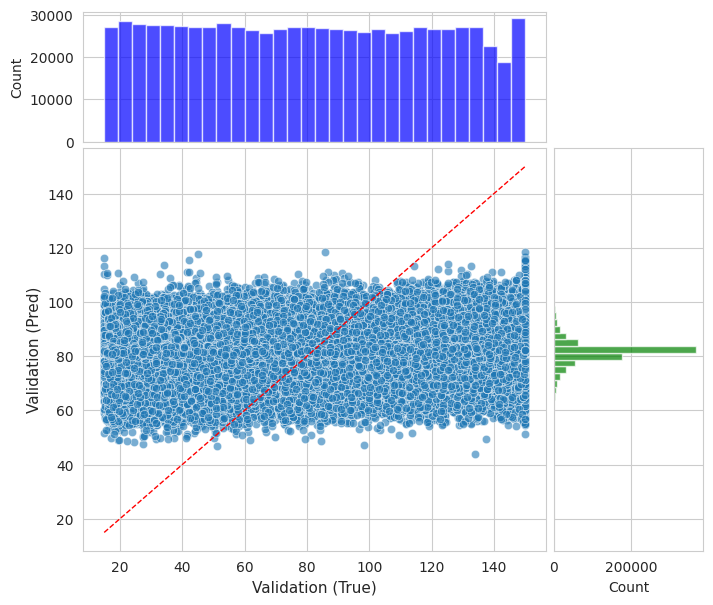

In [39]:
print("Comparison of Validation True and Predicted Values\n")

y_true = y_val
y_pred = model.predict(X_val)

fig = plt.figure(figsize=(8, 7))
grid = plt.GridSpec(4, 4, hspace=0.05, wspace=0.05)
ax_main = fig.add_subplot(grid[1:4, 0:3])
ax_xhist = fig.add_subplot(grid[0, 0:3], sharex=ax_main)
ax_yhist = fig.add_subplot(grid[1:4, 3], sharey=ax_main)
ax_main.scatter(y_true, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
ax_main.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)

ax_xhist.hist(y_true, bins=30, color='blue', alpha=0.7)
ax_xhist.set_ylabel('Count')
ax_yhist.hist(y_pred, bins=30, orientation='horizontal', color='green', alpha=0.7)
ax_yhist.set_xlabel('Count')
plt.setp(ax_xhist.get_xticklabels(), visible=False)
plt.setp(ax_yhist.get_yticklabels(), visible=False)

ax_main.set_xlabel('Validation (True)', fontsize=11)
ax_main.set_ylabel('Validation (Pred)', fontsize=11)
ax_main.grid(True)
plt.show()


<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 15px 150px;
 margin-left: 0px;
">
Submission
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Test Data Prediction
</p>

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


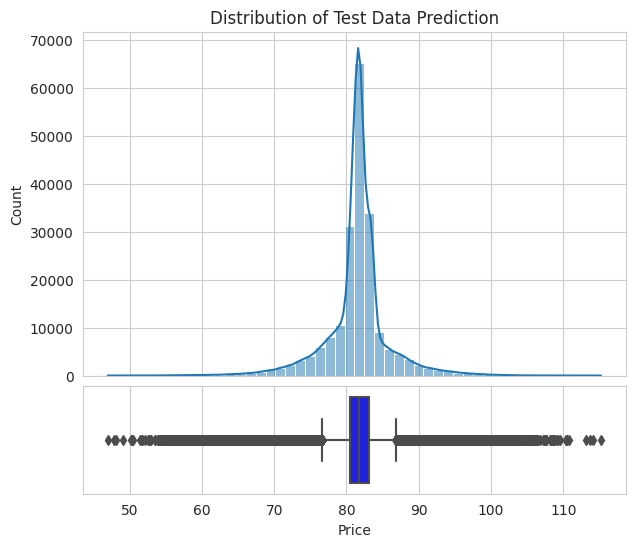

In [40]:
# Distribution of Test Data Prediction

y_test_pred = model.predict(test)

fig = plt.figure(figsize=(7, 6))
grid = plt.GridSpec(4, 1, hspace=0.1) 
ax_hist = fig.add_subplot(grid[0:3, 0]) 
ax_box = fig.add_subplot(grid[3, 0], sharex=ax_hist)

sns.histplot(y_test_pred, bins=50, kde=True, color='blue', ax=ax_hist, legend=False)
ax_hist.set_title("Distribution of Test Data Prediction")
ax_hist.set_xlabel("")

sns.boxplot(x=y_test_pred, ax=ax_box, color='blue')
ax_box.set_xlabel("Price")

plt.setp(ax_hist.get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 50px;
 margin-left: 0px;
">
Submission File Creation
</p>

In [41]:
y_test_pred = np.array(y_test_pred).flatten() 
submission = pd.DataFrame({'id': test.index, 'Price': y_test_pred})
submission.to_csv('submission.csv', index=False)
display(submission)

,id,Price
0,300000,82.615753
1,300001,83.266159
2,300002,88.159546
3,300003,78.543747
4,300004,80.851921
...,...,...
199995,499995,82.746140
199996,499996,81.442902
199997,499997,82.069710
199998,499998,81.501060
